In [314]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf

In [315]:
df = pd.read_csv('BBCA_JK.csv')



In [316]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2004-06-08,99.696129,101.100300,98.291958,98.291958,499150000
1,2004-06-09,101.100273,102.504444,98.291932,99.696103,294290000
2,2004-06-10,101.100273,101.100273,99.696103,101.100273,165590000
3,2004-06-11,101.100273,101.100273,99.696103,99.696103,135830000
4,2004-06-14,99.696129,101.100300,98.291958,101.100300,158540000


In [317]:
series_shifted = df['Close'].shift()
df['prev_close'] = series_shifted # 1 hari sblm tanggal tsb 
df.head()
df = df.drop(df.index[0]).reset_index(drop=True)
dates = df['Date']

In [318]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [319]:
df.shape

(5173, 7)

In [320]:
df.isnull().sum()

Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
prev_close    0
dtype: int64

In [321]:
df.dropna(subset=['prev_close'], inplace=True)
df.isnull().sum()

Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
prev_close    0
dtype: int64

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5173 entries, 0 to 5172
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5173 non-null   object 
 1   Close       5173 non-null   float64
 2   High        5173 non-null   float64
 3   Low         5173 non-null   float64
 4   Open        5173 non-null   float64
 5   Volume      5173 non-null   int64  
 6   prev_close  5173 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 283.0+ KB


In [323]:
df.dtypes

Date           object
Close         float64
High          float64
Low           float64
Open          float64
Volume          int64
prev_close    float64
dtype: object

In [324]:
df.describe()

,Close,High,Low,Open,Volume,prev_close
count,5173.000000,5173.000000,5173.000000,5173.000000,5.173000e+03,5173.000000
mean,3103.670484,3132.749785,3074.203823,3103.853605,1.069271e+08,3101.819469
std,2892.704318,2917.047461,2869.535131,2893.117083,1.275221e+08,2891.561920
min,99.696129,99.696129,98.291900,98.291900,0.000000e+00,99.696129
25%,641.009216,648.595047,637.216112,641.009216,4.961750e+07,641.009216
50%,2085.327881,2113.949973,2060.795059,2093.505859,7.326250e+07,2082.296143
75%,5212.767578,5244.425742,5182.410156,5204.595103,1.161475e+08,5208.430664
max,10570.414062,10570.414062,10401.480469,10522.147296,1.949960e+09,10570.414062


array([[<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'prev_close'}>]], dtype=object)

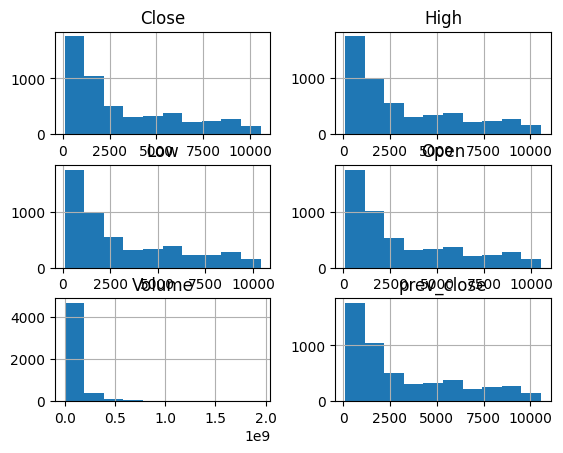

In [325]:
df.hist()

<Axes: >

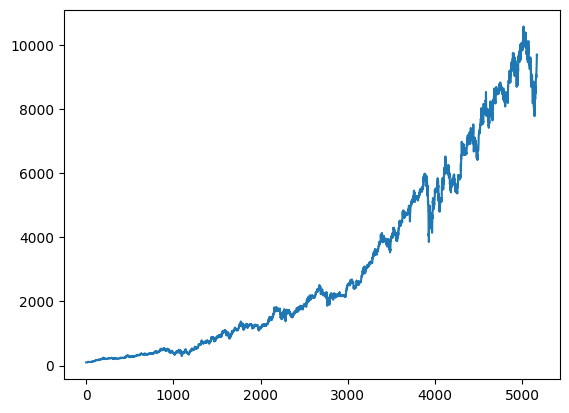

In [326]:
df['Close'].plot()

In [327]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'prev_close'], dtype='object')

In [328]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
x = df[['Year', 'Month', 'Day', 'prev_close']]

In [329]:
x.head()

,Year,Month,Day,prev_close
0,2004,6,9,99.696129
1,2004,6,10,101.100273
2,2004,6,11,101.100273
3,2004,6,14,101.100273
4,2004,6,15,99.696129


### Linear Regression

In [330]:
# x & y
x = df[['prev_close']]
y=df['Close']

In [331]:
df.head()

,Date,Close,High,Low,Open,Volume,prev_close,Year,Month,Day
0,2004-06-09,101.100273,102.504444,98.291932,99.696103,294290000,99.696129,2004,6,9
1,2004-06-10,101.100273,101.100273,99.696103,101.100273,165590000,101.100273,2004,6,10
2,2004-06-11,101.100273,101.100273,99.696103,99.696103,135830000,101.100273,2004,6,11
3,2004-06-14,99.696129,101.100300,98.291958,101.100300,158540000,101.100273,2004,6,14
4,2004-06-15,102.504410,102.504410,98.291900,98.291900,297620000,99.696129,2004,6,15


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# data time series(deret waktu saham) - data masa depan tdk bs digunakan prediksi masa lalu 
split_ratio = 0.8
split_index = int(len(x) * split_ratio)

X_train = x[:split_index]
y_train = y[:split_index]
dates_train = dates[:split_index]

X_test = x[split_index:]
y_test = y[split_index:]
dates_test = dates[split_index:]

In [333]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler_x = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [334]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

LinearRegression()

In [335]:
# predict value
predicted = LR.predict(X_test_scaled)
print(X_test_scaled)

[[0.92464779]
 [0.9281043 ]
 [0.93225216]
 ...
 [1.4600284 ]
 [1.49506795]
 [1.48728139]]


In [336]:
predicted_train = LR.predict(X_train_scaled)
print(X_train_scaled)

[[0.00000000e+00]
 [2.18669237e-04]
 [2.18669237e-04]
 ...
 [9.38473964e-01]
 [9.19117428e-01]
 [9.27413162e-01]]


In [337]:
predicted.shape

(1035,)

In [338]:
# data = pd.DataFrame({
#     "Actual": y_test.ravel(),      # ubah ke 1D
#     "Predicted": predicted.ravel() # ubah ke 1D
# })

# print(data)

In [339]:
LR.score(X_test_scaled, y_test)

0.9927756672076907

In [340]:
from sklearn import metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print("MAE : ", mae)
print("MSE : ", mse)
print("R^2 score : ", r2)

MAE :  83.20810947428694
MSE :  13045.285522528777
R^2 score :  0.9927756672076907


In [341]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(LR, x, y, scoring=mae_scorer, cv=5)
mse_scores = cross_val_score(LR, x, y, scoring=mse_scorer, cv=5)
rmse_scores = np.sqrt(-mse_scores)  # RMSE dari MSE negatif

print("Cross-validated RMSE:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Cross-validated MAE:", -mae_scores)  # MAE hasil cross_val_score negatif
print("Mean MAE:", -mae_scores.mean())

Cross-validated RMSE: [  7.45456936  18.4094936   30.31568184  70.96990697 114.269992  ]
Mean RMSE: 48.283928752408784
Cross-validated MAE: [ 5.19544802 13.85426599 21.09279964 44.3152579  83.2749901 ]
Mean MAE: 33.546552327707914


In [342]:
# y_test_asli = scaler_y.inverse_transform(y_test)
# predicted_asli = scaler_y.inverse_transform(predicted)

In [343]:
# predicted = LR.predict(x)
# print(predicted)

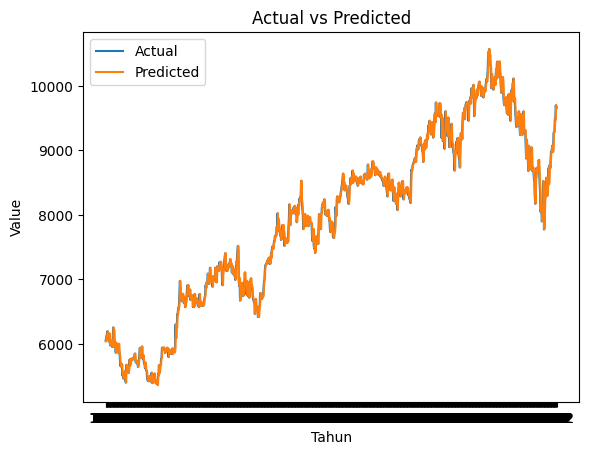

In [344]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(dates_test, y_test, label='Actual')
ax.plot(dates_test, predicted, label='Predicted')

# Format sumbu-x hanya tahun
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Tahun")
plt.ylabel("Value")
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

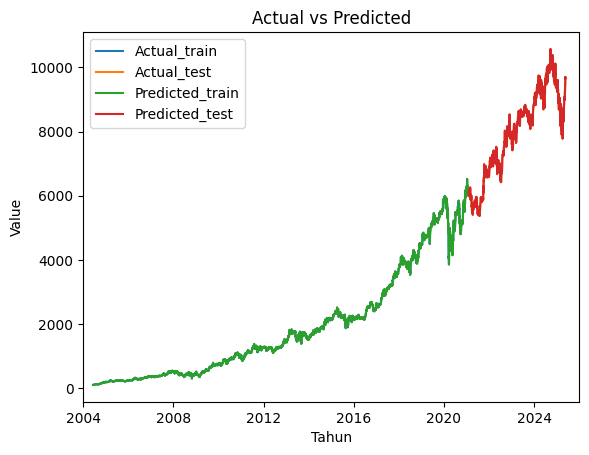

In [345]:
import matplotlib.dates as mdates
import datetime


dates_train = pd.to_datetime(dates_train)
dates_test = pd.to_datetime(dates_test)

fig, ax = plt.subplots()
ax.plot(dates_train, y_train, label='Actual_train')
ax.plot(dates_test, y_test, label='Actual_test')
ax.plot(dates_train, predicted_train, label='Predicted_train')
ax.plot(dates_test, predicted, label='Predicted_test')

ax.set_xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2026-01-01'))
ax.xaxis.set_major_locator(mdates.YearLocator(base=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Tahun")
plt.ylabel("Value")
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [346]:
print(x.tail(1))

      prev_close
5172      9650.0


61985791.12722007
398158763720.1702
2557528075454847.0
1.642799418911336e+19
maximum from predict :  1.642799418911336e+19 date :  2025-05-27 00:00:00
minimum from predict :  61985791.12722007 date :  2025-05-24 00:00:00


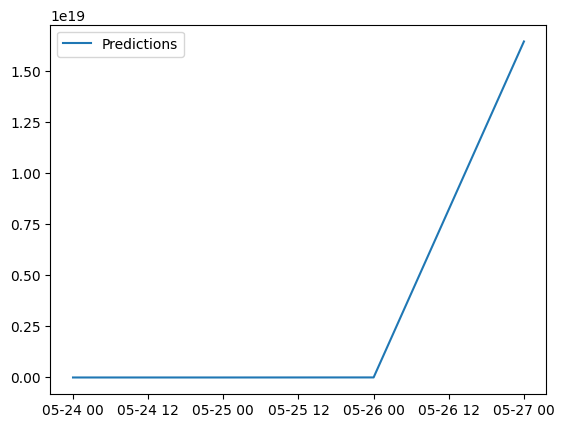

In [347]:
import datetime
import numpy as np
X_last = x.iloc[-1].values
X_last = X_last.reshape(1, -1)  # jadi shape: [1, 3]

test_res = []
curr_date = pd.to_datetime(dates.iloc[-1])
day_pred = []
day = int(input("berapa hari yang ingin di prediksi : "))
for i in range(day):
    test_predictions = LR.predict(X_last).item()
    X_last = np.roll(X_last, -1)  # geser ke kiri
    X_last[0, -1] = test_predictions  # isi hasil prediksi ke kolom terakhir

    now_date = curr_date + datetime.timedelta(days=1)
    curr_date = now_date
    day_pred.append(now_date)

    test_res.append(test_predictions)
    print(test_predictions)

#cari min, max dari saham yang sudah di predict
print("maximum from predict : ",max(test_res), "date : ",day_pred[test_res.index(max(test_res))])
print("minimum from predict : ",min(test_res), "date : ",day_pred[test_res.index(min(test_res))])

plt.plot(day_pred, test_res)
plt.legend(['Predictions'])
plt.show()

c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


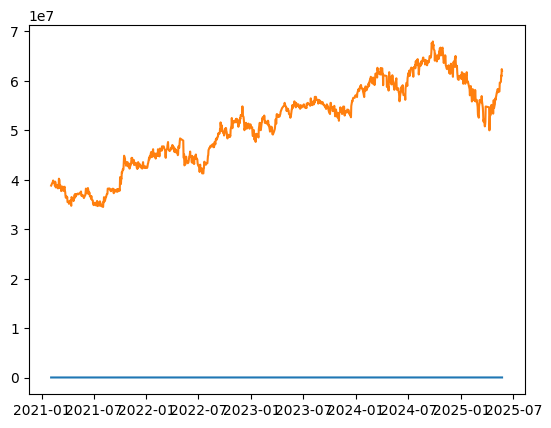

In [348]:
predicted = LR.predict(X_test)
plt.plot(dates_test, y_test)
plt.plot(dates_test, predicted)

c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


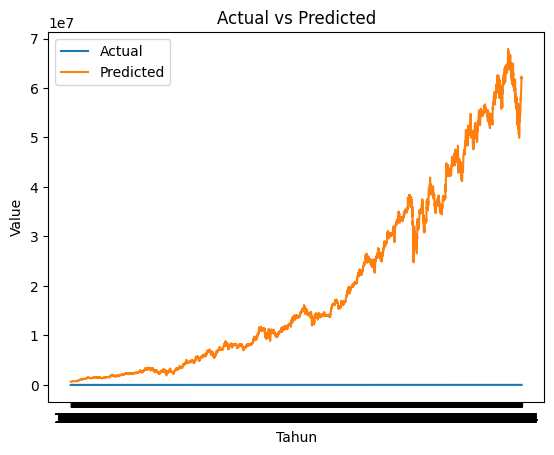

In [349]:
import matplotlib.dates as mdates
predicted = LR.predict(x)

fig, ax = plt.subplots()
ax.plot(dates, y, label='Actual')
ax.plot(dates, predicted, label='Predicted')

# Format sumbu-x hanya tahun
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Tahun")
plt.ylabel("Value")
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [350]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
def make_windowed_df(prices: pd.Series, window_size: int):
    data = []
    for i in range(len(prices) - window_size):
        window = prices.iloc[i:i+window_size+1]
        data.append(window.values)

    columns = [f"t-{i}" for i in range(window_size, 0, -1)] + ["t"]
    return pd.DataFrame(data, columns=columns)

# Contoh penggunaan
window_size = 3
x_series = pd.Series(x.flatten()) 
windowed_df = make_windowed_df(x_series, window_size)

def windowed_df_to_X_y_linear(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    X = df_as_np[:, 1:-1]
    y = df_as_np[:, -1]
    return X.astype(np.float32), y.astype(np.float32)

X_lin, y_lin = windowed_df_to_X_y_linear(windowed_df)

def train_eval_linear_fold(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=False)
    rmse_list, mae_list = [], []

    for train_idx, val_idx in kf.split(X):
        model = LinearRegression()
        model.fit(X[train_idx], y[train_idx])
        preds = model.predict(X[val_idx])
        rmse = np.sqrt(mean_squared_error(y[val_idx], preds))
        mae = mean_absolute_error(y[val_idx], preds)
        rmse_list.append(rmse)
        mae_list.append(mae)

    print("Linear - RMSE:", rmse_list, "Mean:", np.mean(rmse_list))
    print("Mean RMSE : ", np.mean(rmse_list))
    print("Linear - MAE:", mae_list, "Mean:", np.mean(mae_list))
train_eval_linear_fold(X_lin, y_lin)

AttributeError: 'DataFrame' object has no attribute 'flatten'

In [ ]:

print(y.min(), y.max())

99.69612884521484 10570.4140625
